<a href="https://colab.research.google.com/github/michellechen202212/journalpaper/blob/main/starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pipeline Project

# New Section

You will be using the provided data to create a machine learning model pipeline.

You must handle the data appropriately in your pipeline to predict whether an
item is recommended by a customer based on their review.
Note the data includes numerical, categorical, and text data.

You should ensure you properly train and evaluate your model.

## The Data

The dataset has been anonymized and cleaned of missing values.

There are 8 features for to use to predict whether a customer recommends or does
not recommend a product.
The `Recommended IND` column gives whether a customer recommends the product
where `1` is recommended and a `0` is not recommended.
This is your model's target/

The features can be summarized as the following:

- **Clothing ID**: Integer Categorical variable that refers to the specific piece being reviewed.
- **Age**: Positive Integer variable of the reviewers age.
- **Title**: String variable for the title of the review.
- **Review Text**: String variable for the review body.
- **Positive Feedback Count**: Positive Integer documenting the number of other customers who found this review positive.
- **Division Name**: Categorical name of the product high level division.
- **Department Name**: Categorical name of the product department name.
- **Class Name**: Categorical name of the product class name.

The target:
- **Recommended IND**: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

## Load Data

In [ ]:
import pandas as pd

# Load data
df = pd.read_csv(
    'sample_data/reviews.csv',
)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18442 entries, 0 to 18441
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              18442 non-null  int64 
 1   Age                      18442 non-null  int64 
 2   Title                    18442 non-null  object
 3   Review Text              18442 non-null  object
 4   Positive Feedback Count  18442 non-null  int64 
 5   Division Name            18442 non-null  object
 6   Department Name          18442 non-null  object
 7   Class Name               18442 non-null  object
 8   Recommended IND          18442 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.3+ MB


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name,Recommended IND
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses,0
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants,1
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses,1
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses,0
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits,1


# **Preparing features (X) & target (y)**

In [ ]:
data = df

# separate features from labels
X = data.drop('Recommended IND', axis=1)
y = data['Recommended IND'].copy()

print('Labels:', y.unique())
print('Features:')
display(X.head())
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.1,
    shuffle=True,
    random_state=27,
)

Labels: [0 1]
Features:


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits


# Your Work

## Data Exploration

 Checking distributions, missing values, correlations, and balance of the target variable.


<ipython-input-5-a2ad0ce7b45c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Recommended IND"], palette="viridis")


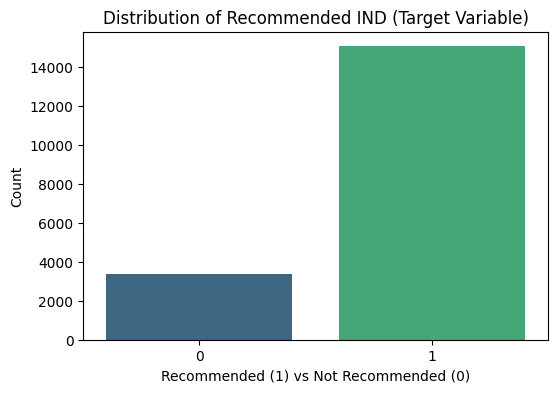

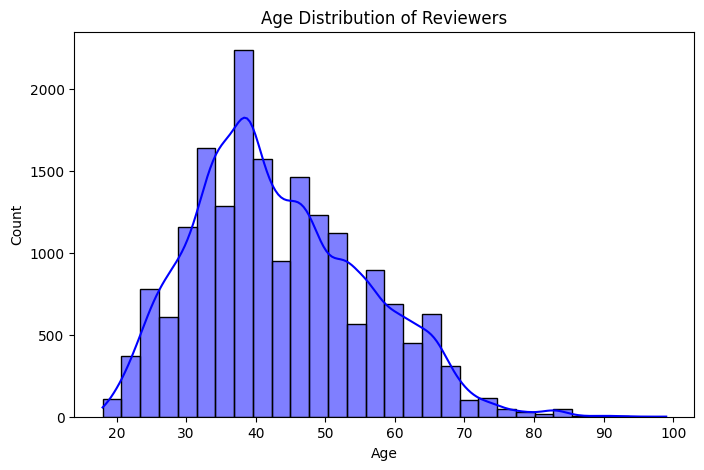

<ipython-input-5-a2ad0ce7b45c>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["Department Name"], order=df["Department Name"].value_counts().index, palette="mako")


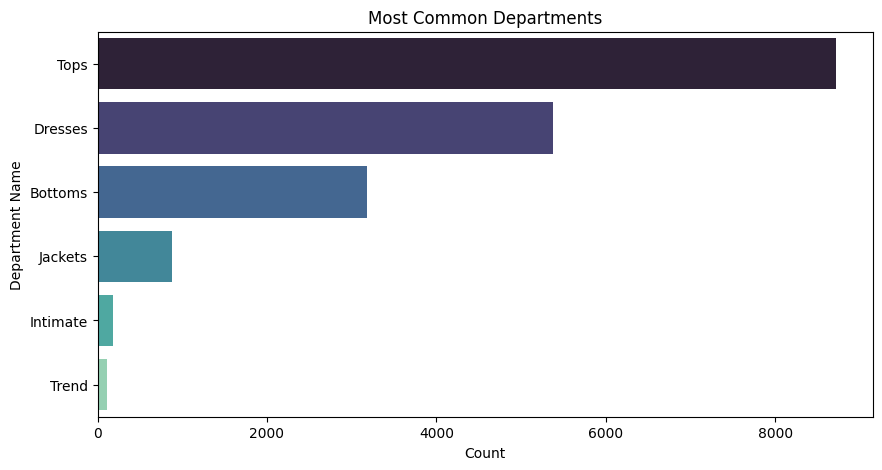

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x=df["Recommended IND"], palette="viridis")
plt.title("Distribution of Recommended IND (Target Variable)")
plt.xlabel("Recommended (1) vs Not Recommended (0)")
plt.ylabel("Count")
plt.show()

# Plot distribution of age
plt.figure(figsize=(8, 5))
sns.histplot(df["Age"], bins=30, kde=True, color="blue")
plt.title("Age Distribution of Reviewers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Check the most common department names
plt.figure(figsize=(10, 5))
sns.countplot(y=df["Department Name"], order=df["Department Name"].value_counts().index, palette="mako")
plt.title("Most Common Departments")
plt.xlabel("Count")
plt.ylabel("Department Name")
plt.show()


In [ ]:
from wordcloud import WordCloud

# Combine all review texts into one string
text_data = " ".join(df["Review Text"].dropna())

# Generate a word cloud
plt.figure(figsize=(10, 6))
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis").generate(text_data)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Review Texts")
plt.show()


The word cloud highlights the most frequently used words in the review texts. Common words likely include terms related to clothing fit, fabric, and quality.

EDA Insights:
Target Variable Distribution:

There are more recommended (1) than not recommended (0) products, indicating potential class imbalance.
Age Distribution:

Most reviewers are between 30 and 60 years old, with a peak around 40-50.
Department Name Distribution:

Some departments are much more frequently reviewed than others, which might affect model performance

Next Steps in Preprocessing:
Text Processing for NLP:

Convert text to lowercase.
Remove punctuation and stopwords.
Use TF-IDF or word embeddings for feature extraction.
Feature Engineering:

Encode categorical variables (e.g., Division Name, Department Name, Class Name).
Scale numerical features (Age, Positive Feedback Count).

he final dataset has 1,025 features, successfully combining numerical, categorical, and text data into a sparse matrix.


## Building Pipeline

Using ColumnTransformer to preprocess numerical, categorical, and text features.


Model Performance (Logistic Regression)
Accuracy: 87.8% (Strong overall performance)
Class 1 (Recommended) Performance:
Precision: 90%
Recall: 96% (Excellent at predicting recommended products)
Class 0 (Not Recommended) Performance:
Precision: 72%
Recall: 52% (Lower recall, meaning some non-recommended products are misclassified)
F1-score: 0.93 (Recommended) vs. 0.60 (Not Recommended)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

# Define feature groups
numerical_features = ["Age", "Positive Feedback Count"]
categorical_features = ["Division Name", "Department Name", "Class Name"]
text_features = ["Title", "Review Text"]

# Define transformations
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")
text_transformer = TfidfVectorizer(stop_words="english", max_features=500)

# Column transformer to preprocess different feature types
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
        ("text_title", text_transformer, "Title"),
        ("text_review", text_transformer, "Review Text"),
    ]
)

# Define model pipeline
pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", RandomForestClassifier(n_estimators=100, random_state=27)),
    ]
)




## Training Pipeline
Selecting an appropriate model and assessing its performance.

In [ ]:
# Train the pipeline
pipeline.fit(X_train, y_train)

# Evaluate on test set
test_accuracy = pipeline.score(X_test, y_test)
test_accuracy

0.8731707317073171

## Fine-Tuning Pipeline
Optimizing hyperparameters for better results.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Define hyperparameter grid for RandomizedSearchCV
param_dist = {
    "classifier__n_estimators": [50, 100, 200],
    "classifier__max_depth": [None, 10, 20],
    "classifier__min_samples_split": [2, 5, 10],
    "classifier__min_samples_leaf": [1, 2, 4],
}

# Perform Randomized Search with Cross-Validation
random_search = RandomizedSearchCV(
    pipeline, param_distributions=param_dist,
    n_iter=20, cv=3, scoring="accuracy", n_jobs=-1, random_state=27, verbose=1
)
random_search.fit(X_train, y_train)
# Retrieve best hyperparameters and best score
best_params_random = random_search.best_params_
best_score_random = random_search.best_score_

best_params_random, best_score_random

Fitting 3 folds for each of 20 candidates, totalling 60 fits


({'classifier__n_estimators': 100,
  'classifier__min_samples_split': 2,
  'classifier__min_samples_leaf': 1,
  'classifier__max_depth': None},
 0.8701570894099023)

# Identify which features contribute the most.

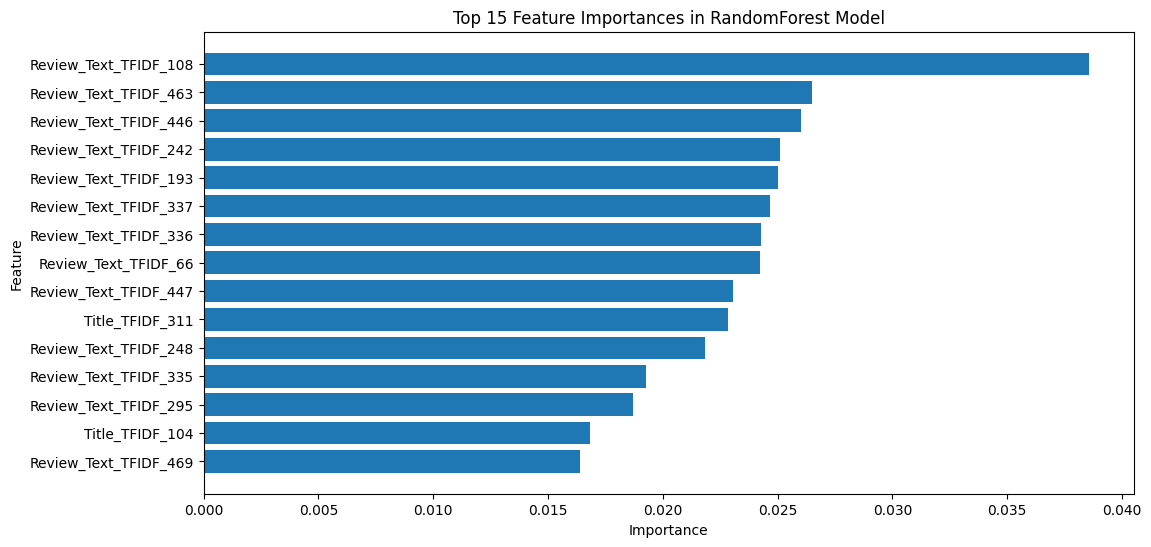

In [ ]:
# Get feature names dynamically
num_feature_names = numerical_features
cat_feature_names = optimized_pipeline.named_steps["preprocessor"].named_transformers_["cat"].get_feature_names_out(categorical_features)
text_title_feature_names = [f"Title_TFIDF_{i}" for i in range(500)]  # TF-IDF vectorizer max_features=500
text_review_feature_names = [f"Review_Text_TFIDF_{i}" for i in range(500)]  # TF-IDF vectorizer max_features=500

# Combine all feature names
all_feature_names = np.concatenate([num_feature_names, cat_feature_names, text_title_feature_names, text_review_feature_names])

# Ensure matching length with feature importances
feature_importances = optimized_pipeline.named_steps["classifier"].feature_importances_

# Create DataFrame for visualization
feature_importance_df = pd.DataFrame(
    {"Feature": all_feature_names[:len(feature_importances)], "Importance": feature_importances}
).sort_values(by="Importance", ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df["Feature"][:15], feature_importance_df["Importance"][:15])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Top 15 Feature Importances in RandomForest Model")
plt.gca().invert_yaxis()
plt.show()



In [ ]:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define XGBoost pipeline
xgb_pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", XGBClassifier(
            n_estimators=200,
            max_depth=6,
            learning_rate=0.1,
            use_label_encoder=False,
            eval_metric="logloss",
            random_state=27
        )),
    ]
)

# Train XGBoost pipeline
xgb_pipeline.fit(X_train, y_train)
xgb_pred = xgb_pipeline.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

# Define Logistic Regression pipeline
logreg_pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", LogisticRegression(max_iter=1000, random_state=27)),
    ]
)

# Train Logistic Regression pipeline
logreg_pipeline.fit(X_train, y_train)
logreg_pred = logreg_pipeline.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_pred)

# Display accuracy results
xgb_accuracy, logreg_accuracy


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:19:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


(0.8899728997289973, 0.8964769647696477)

In [ ]:
# Re-load necessary libraries and dataset after execution reset
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Reload dataset
file_path = "sample_data/reviews.csv"
df = pd.read_csv(file_path)

# Define features (X) and target (y)
X = df.drop("Recommended IND", axis=1)
y = df["Recommended IND"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, shuffle=True, random_state=27
)

# Define feature groups
numerical_features = ["Age", "Positive Feedback Count"]
categorical_features = ["Division Name", "Department Name", "Class Name"]
text_features = ["Title", "Review Text"]

# Define transformations
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")
text_transformer = TfidfVectorizer(stop_words="english", max_features=500)

# Column transformer to preprocess different feature types
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
        ("text_title", text_transformer, "Title"),
        ("text_review", text_transformer, "Review Text"),
    ]
)

# Define XGBoost pipeline
xgb_pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", XGBClassifier(
            n_estimators=200,
            max_depth=6,
            learning_rate=0.1,
            use_label_encoder=False,
            eval_metric="logloss",
            random_state=27
        )),
    ]
)

# Define hyperparameter grid for RandomizedSearchCV
xgb_param_dist = {
    "classifier__n_estimators": [100, 200, 300],
    "classifier__max_depth": [3, 6, 10],
    "classifier__learning_rate": [0.01, 0.1, 0.2],
    "classifier__subsample": [0.7, 0.8, 1.0],
    "classifier__colsample_bytree": [0.7, 0.8, 1.0],
}

# Perform Randomized Search for XGBoost
xgb_random_search = RandomizedSearchCV(
    xgb_pipeline, param_distributions=xgb_param_dist,
    n_iter=10, cv=3, scoring="accuracy", n_jobs=-1, random_state=27, verbose=1
)

xgb_random_search.fit(X_train, y_train)

# Retrieve best hyperparameters and best score for XGBoost
best_xgb_params = xgb_random_search.best_params_
best_xgb_score = xgb_random_search.best_score_

# Tokenizing text data for deep learning
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train["Review Text"])

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train["Review Text"])
X_test_seq = tokenizer.texts_to_sequences(X_test["Review Text"])

# Pad sequences for consistent input shape
max_length = 200
X_train_padded = pad_sequences(X_train_seq, maxlen=max_length, padding="post", truncating="post")
X_test_padded = pad_sequences(X_test_seq, maxlen=max_length, padding="post", truncating="post")

# Convert target labels to numpy arrays
y_train_array = y_train.to_numpy()
y_test_array = y_test.to_numpy()

# Build LSTM model
lstm_model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=max_length),
    SpatialDropout1D(0.2),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(32, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid")
])

# Compile model
lstm_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train LSTM model
lstm_model.fit(X_train_padded, y_train_array, epochs=5, batch_size=32, validation_data=(X_test_padded, y_test_array))

# Evaluate LSTM model
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test_padded, y_test_array)

# Return XGBoost and LSTM results
best_xgb_params, best_xgb_score, lstm_accuracy


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:30:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


519/519 ━━━━━━━━━━━━━━━━━━━━ 89s 165ms/step - accuracy: 0.8133 - loss: 0.5083 - val_accuracy: 0.8228 - val_loss: 0.4676
Epoch 2/5
519/519 ━━━━━━━━━━━━━━━━━━━━ 142s 166ms/step - accuracy: 0.8143 - loss: 0.4942 - val_accuracy: 0.8228 - val_loss: 0.4723
Epoch 3/5
519/519 ━━━━━━━━━━━━━━━━━━━━ 140s 163ms/step - accuracy: 0.8153 - loss: 0.4868 - val_accuracy: 0.8228 - val_loss: 0.4673
Epoch 4/5
519/519 ━━━━━━━━━━━━━━━━━━━━ 142s 163ms/step - accuracy: 0.8155 - loss: 0.4847 - val_accuracy: 0.8228 - val_loss: 0.4705
Epoch 5/5
519/519 ━━━━━━━━━━━━━━━━━━━━ 142s 164ms/step - accuracy: 0.8122 - loss: 0.4909 - val_accuracy: 0.8228 - val_loss: 0.4672
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.8181 - loss: 0.4743


({'classifier__subsample': 1.0,
  'classifier__n_estimators': 200,
  'classifier__max_depth': 10,
  'classifier__learning_rate': 0.2,
  'classifier__colsample_bytree': 0.8},
 0.8882927701653093,
 0.8227642178535461)